# DataFrame

## 1. DataFrame 생성
- 2차원 배열 형식
- 표같은 스프레드시트 자료구조
- 여러개의 컬럼을 가지며 서로다른 종류의 값이 담긴다.

**DataFrame 생성 방법**
1. 리스트 값을 딕셔너리로 사용
2. Numpy 배열을 이용
3. read_csv(), read_excel()... 함수 사용

In [1]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
%matplotlib inline

**1. 딕셔너리로 데이터프레임 생성**
- 딕셔너리로 만들면 좋은점 : key값이 columns로 들어간다.
- 데이터프레임의 각 열은 Series이다. 즉, 각 Series마다 데이터타입(dtype)이 다를 수 있다.

In [2]:
dic = {
    'state':['Ohio', 'Ohio', 'Ohio', 'Nevada', 'Nevada', 'Nevada'],
    'year':[2000, 2001, 2002, 2001, 2002, 2003],
    'pop':[1.5, 1.7, 3.6, 2.4, 2.9, 3.2]
      }
df1 = pd.DataFrame(dic)
print('*'*50)
print(df1['state'])
print(type(df1['state']))
print('*'*50)
print(df1['year'])
print(type(df1['year']))
print('*'*50)
print(df1['pop'])
print(type(df1['pop']))
print('*'*50)

**************************************************
0      Ohio
1      Ohio
2      Ohio
3    Nevada
4    Nevada
5    Nevada
Name: state, dtype: object
<class 'pandas.core.series.Series'>
**************************************************
0    2000
1    2001
2    2002
3    2001
4    2002
5    2003
Name: year, dtype: int64
<class 'pandas.core.series.Series'>
**************************************************
0    1.5
1    1.7
2    3.6
3    2.4
4    2.9
5    3.2
Name: pop, dtype: float64
<class 'pandas.core.series.Series'>
**************************************************


In [3]:
dic2 = {
    'name' :['James', 'Peter', 'Tomas', 'Robert'],
    'address' :['NY', ' TEXAS', 'LA', 'TEXAS'],
    'age':[33, 44, 55, 66]
}

df2 = DataFrame(dic2)
df2

,name,address,age
0,James,NY,33
1,Peter,TEXAS,44
2,Tomas,LA,55
3,Robert,TEXAS,66


**2. Numpy 배열을 이용**

In [4]:
np.random.seed(100)
df3 = DataFrame(np.random.randint(10,100,16).reshape(4,4),
                            index=list('abcd'),
                            columns=list('abcd'))

# 컬럼명을 수정
df3.columns = ['one', 'two', 'three', 'four']
df3.head()

,one,two,three,four
a,18,34,77,97
b,89,58,20,62
c,63,76,24,44
d,34,25,70,68


In [5]:
df3.rename(columns={'one': '1', 'two':'둘', 'four':'포'}) # 컬럼명을 부분적으로 바꿔줄 수 있다.

,1,둘,three,포
a,18,34,77,97
b,89,58,20,62
c,63,76,24,44
d,34,25,70,68


**3. read_csv(), read_excel()... 함수 사용**

In [6]:
read_df = pd.read_csv('../data/tips.csv')
read_df.head(3)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2.0
1,10.34,1.66,Male,No,Sun,Dinner,3.0
2,21.01,3.50,Male,No,Sun,Dinner,3.0


## 2. DataFrame 구조
- 구조를 확인하는 속성
    - index
    - columns
    - values
    - dtype**s**
    - info()
    - describe
    - shape

In [7]:
print(read_df.index)

RangeIndex(start=0, stop=245, step=1)


In [8]:
print(read_df.columns)

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')


In [9]:
print(read_df.values)

[[16.99 1.01 'Female' ... 'Sun' 'Dinner' 2.0]
 [10.34 1.66 'Male' ... 'Sun' 'Dinner' 3.0]
 [21.01 3.5 'Male' ... 'Sun' 'Dinner' 3.0]
 ...
 [17.82 1.75 'Male' ... 'Sat' 'Dinner' 2.0]
 [18.78 3.0 'Female' ... 'Thur' 'Dinner' 2.0]
 [25.34 nan nan ... nan nan nan]]


In [10]:
print(read_df.dtypes)

total_bill    float64
tip           float64
sex            object
smoker         object
day            object
time           object
size          float64
dtype: object


In [11]:
print(read_df.describe)

<bound method NDFrame.describe of      total_bill   tip     sex smoker   day    time  size
0         16.99  1.01  Female     No   Sun  Dinner   2.0
1         10.34  1.66    Male     No   Sun  Dinner   3.0
2         21.01  3.50    Male     No   Sun  Dinner   3.0
3         23.68  3.31    Male     No   Sun  Dinner   2.0
4         24.59  3.61  Female     No   Sun  Dinner   4.0
..          ...   ...     ...    ...   ...     ...   ...
240       27.18  2.00  Female    Yes   Sat  Dinner   2.0
241       22.67  2.00    Male    Yes   Sat  Dinner   2.0
242       17.82  1.75    Male     No   Sat  Dinner   2.0
243       18.78  3.00  Female     No  Thur  Dinner   2.0
244       25.34   NaN     NaN    NaN   NaN     NaN   NaN

[245 rows x 7 columns]>


In [12]:
read_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245 entries, 0 to 244
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  245 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    float64
dtypes: float64(3), object(4)
memory usage: 13.5+ KB


In [13]:
read_df.shape # tuple로 출력된다.

(245, 7)

## 3. DataFrame 조회
- info()
- head()
- tail()

In [14]:
read_df.head(3)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2.0
1,10.34,1.66,Male,No,Sun,Dinner,3.0
2,21.01,3.50,Male,No,Sun,Dinner,3.0


In [15]:
read_df.tail(3)

,total_bill,tip,sex,smoker,day,time,size
242,17.82,1.75,Male,No,Sat,Dinner,2.0
243,18.78,3.00,Female,No,Thur,Dinner,2.0
244,25.34,NaN,NaN,NaN,NaN,NaN,NaN


## 4. DataFrame 컬럼명 변경 및 추가
1. 컬럼명 전체 수정 : columns
    - df.columns = [전체 컬럼 수정명]
    - 원본 변경 된다.
2. 컬럼명 부분 수정 : rename
    - df.rename({'처음컬럼명' : '바꿀컬럼명', ...})
    - 원본 변경 X
    - 변경 희망시 inplace=True를 지정해준다.
3. 컬럼 추가

In [16]:
np.random.seed(100)
df3 = DataFrame(np.random.randint(10,100,16).reshape(4,4),
                            index=list('abcd'),
                            columns=list('abcd'))

# 컬럼명을 수정
df3.columns = ['one', 'two', 'three', 'four']
df3.head()

,one,two,three,four
a,18,34,77,97
b,89,58,20,62
c,63,76,24,44
d,34,25,70,68


In [17]:
# 전체 컬럼명 변경
df3.columns = ['A-class', 'B-class', 'C-class', 'D-class']
df3

,A-class,B-class,C-class,D-class
a,18,34,77,97
b,89,58,20,62
c,63,76,24,44
d,34,25,70,68


In [18]:
# 부분 컬럼명 변경
df2

,name,address,age
0,James,NY,33
1,Peter,TEXAS,44
2,Tomas,LA,55
3,Robert,TEXAS,66


In [19]:
df2.rename(columns={'address' : 'addr'}, inplace=True)
df2

,name,addr,age
0,James,NY,33
1,Peter,TEXAS,44
2,Tomas,LA,55
3,Robert,TEXAS,66


In [20]:
# 컬럼 추가하기
df2['phone'] = np.nan

In [21]:
df2

,name,addr,age,phone
0,James,NY,33,NaN
1,Peter,TEXAS,44,NaN
2,Tomas,LA,55,NaN
3,Robert,TEXAS,66,NaN


# 5. 데이터 색인, 선택, 필터링
- loc : 라벨값 기반의 2차원 인덱싱
- iloc : 순서를 나타내는 정수 기반의 2차원 인덱싱
- at : 라벨값 기반의 2차원 인덱싱 (한 개의 스칼라 값만 찾는다)
- iat : 순서를 나타내는 정수 기반의 2차원 인덱싱 (한 개의 스칼라 값만 찾는다.)

In [22]:
df3

,A-class,B-class,C-class,D-class
a,18,34,77,97
b,89,58,20,62
c,63,76,24,44
d,34,25,70,68


In [23]:
df3.columns = ['one', 'two', 'three', 'four'] # 원래 컬럼명으로 변경
df3

,one,two,three,four
a,18,34,77,97
b,89,58,20,62
c,63,76,24,44
d,34,25,70,68


In [24]:
# 슬라이싱 하는 방법
# 1. 정수형 슬라이싱
# 2. 라벨형 슬라이싱

## 행 추출
df3[0:2] # 정수형 슬라이싱
df3['a':'b'] # 라벨형 슬라이싱

,one,two,three,four
a,18,34,77,97
b,89,58,20,62


In [25]:
df3['one' : 'three'] # 인덱스에 'one', 'three'에 해당하는 부분은 없으니까 컬럼명(heading)만 출력된다.

,one,two,three,four


In [26]:
# 컬럼으로만 추출 : 2차원 구조로 만든다.
df3[['one' , 'three']]

,one,three
a,18,77
b,89,20
c,63,24
d,34,70


In [27]:
df3[df3['two']>40] # 조건부 슬라이싱

,one,two,three,four
b,89,58,20,62
c,63,76,24,44


In [28]:
df3[df3['two']>40].iloc[:, 1:2]

,two
b,58
c,76


**iloc, loc, iat, at 사용하기**

In [29]:
df2

,name,addr,age,phone
0,James,NY,33,NaN
1,Peter,TEXAS,44,NaN
2,Tomas,LA,55,NaN
3,Robert,TEXAS,66,NaN


In [30]:
# iloc : 인덱싱으로 가져오기
print(df2.iloc[1:3]) #  끝수 포함 안됨
print('*'*50)
print(df2.iloc[1:3, 0:4])
print('*'*50)
print(df2.iloc[1:3])

    name    addr  age  phone
1  Peter   TEXAS   44    NaN
2  Tomas      LA   55    NaN
**************************************************
    name    addr  age  phone
1  Peter   TEXAS   44    NaN
2  Tomas      LA   55    NaN
**************************************************
    name    addr  age  phone
1  Peter   TEXAS   44    NaN
2  Tomas      LA   55    NaN


In [31]:
# loc : 라벨기준으로 가져오기
df2.loc[1:2] # 라벨형 슬라이싱처럼 처음과 끝을 포함한다.
# == df2.iloc[1:3]

,name,addr,age,phone
1,Peter,TEXAS,44,NaN
2,Tomas,LA,55,NaN


In [32]:
df2.loc[1:2, 'name' : 'age']

,name,addr,age
1,Peter,TEXAS,44
2,Tomas,LA,55


In [33]:
# 스칼라값 가져오기 iat, at

# iat[idx, idx] : 행과 열을 둘다 인덱스로 써준다. 
df2.iat[3,2]

# at[label, label] : 라벨값으로 둘다 써줘야한다.
df2.at[2, 'addr']

'LA'

In [34]:
# Tomas의 나이 55를 출력
print(df2.iat[2,2])
print(df2.at[2, 'age'])

# Robert의 주소 TEXAS를 출력
print(df2.iat[3,1])
print(df2.at[3,'addr'])

# Tomas의 현재 나이가 55세, iat를 이용해서 Toms의 나이를 50세로 변경
ddf = df2.copy()
ddf
ddf.iat[2,2] = 50
ddf.iat[2,2]

55
55
TEXAS
TEXAS


50

In [35]:
# 5번째 row추가, ... loc를 이용해서, 값은 전부 누락데이터
df2.loc[4] = np.nan
df2

,name,addr,age,phone
0,James,NY,33.0,NaN
1,Peter,TEXAS,44.0,NaN
2,Tomas,LA,55.0,NaN
3,Robert,TEXAS,66.0,NaN
4,NaN,NaN,NaN,NaN


In [36]:
# 마지막 row를 삭제한다.
df2.drop(4) # 라벨을 삭제, inplace=False
df2

,name,addr,age,phone
0,James,NY,33.0,NaN
1,Peter,TEXAS,44.0,NaN
2,Tomas,LA,55.0,NaN
3,Robert,TEXAS,66.0,NaN
4,NaN,NaN,NaN,NaN


In [37]:
# phone에 해당하는 부분을 삭제하고 원본 반영
df2.drop(columns='phone', axis=1, inplace=True)
df2

,name,addr,age
0,James,NY,33.0
1,Peter,TEXAS,44.0
2,Tomas,LA,55.0
3,Robert,TEXAS,66.0
4,NaN,NaN,NaN


In [38]:
df2.drop(4, inplace=True)
df2

,name,addr,age
0,James,NY,33.0
1,Peter,TEXAS,44.0
2,Tomas,LA,55.0
3,Robert,TEXAS,66.0


# 6. DataFrame 데이터 정렬하기
- sort_index()
    - axis=0 (default), axis=1 각 축 기준으로 정렬한다.
- sort_values()
    - DF의 값들을 정렬한다.
    - by='컬럼명' : 특정 컬럼을 기준으로 정렬한다.

In [41]:
df3.sort_index(ascending=False)

,one,two,three,four
d,34,25,70,68
c,63,76,24,44
b,89,58,20,62
a,18,34,77,97


In [45]:
df3.sort_index(axis=1, ascending=False)

,two,three,one,four
a,34,77,18,97
b,58,20,89,62
c,76,24,63,44
d,25,70,34,68


In [48]:
df3.sort_values(by=['one', 'three'])

,one,two,three,four
a,18,34,77,97
d,34,25,70,68
c,63,76,24,44
b,89,58,20,62


In [49]:
df3.sort_values(by=['one'])

,one,two,three,four
a,18,34,77,97
d,34,25,70,68
c,63,76,24,44
b,89,58,20,62


### 실전데이터로 응용해보기

In [51]:
read_df.head(3)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2.0
1,10.34,1.66,Male,No,Sun,Dinner,3.0
2,21.01,3.50,Male,No,Sun,Dinner,3.0


In [55]:
#### Q1. tip비율로 sort(), 많이 받은 팁이 위로 오게... 샘플 데이터 5개만 추출
read_df.sort_values(by=['tip'], ascending=False).head()

,total_bill,tip,sex,smoker,day,time,size
170,50.81,10.00,Male,Yes,Sat,Dinner,3.0
212,48.33,9.00,Male,No,Sat,Dinner,4.0
23,39.42,7.58,Male,No,Sat,Dinner,4.0
59,48.27,6.73,Male,No,Sat,Dinner,4.0
141,34.30,6.70,Male,No,Thur,Lunch,6.0


<AxesSubplot:>

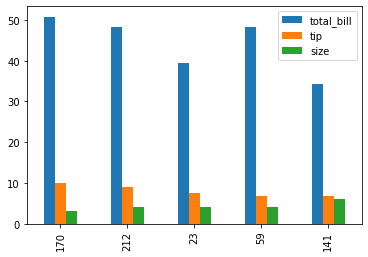

In [66]:
read_df.sort_values(by=['tip'], ascending=False).head().plot(kind='bar')

<AxesSubplot:>

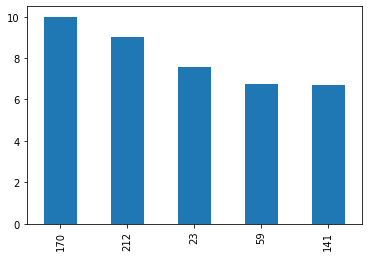

In [71]:
read_df.sort_values(by=['tip'], ascending=False).head()['tip'].plot(kind='bar')

Text(0, 0.5, 'tip')

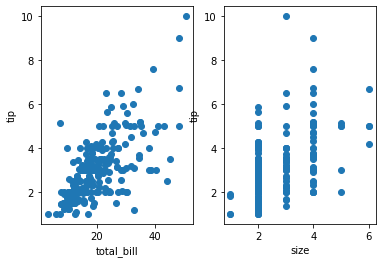

In [70]:
plt.subplot(1,2,1)
plt.scatter(read_df['total_bill'], read_df['tip'])
plt.xlabel('total_bill')
plt.ylabel('tip')

plt.subplot(1,2,2)
plt.scatter(read_df['size'], read_df['tip'])
plt.xlabel('size')
plt.ylabel('tip')

In [57]:
#### Q2. 요일별, tip별 각각 다르게 정렬
# day는 내림차순, tip은 오름차순
# 마지막 데이터 7개만 출력
read_df.sort_values(by=['day', 'tip'], ascending=[False, True]).tail(7)

,total_bill,tip,sex,smoker,day,time,size
94,22.75,3.25,Female,No,Fri,Dinner,2.0
221,13.42,3.48,Female,Yes,Fri,Lunch,2.0
91,22.49,3.50,Male,No,Fri,Dinner,2.0
96,27.28,4.00,Male,Yes,Fri,Dinner,2.0
93,16.32,4.30,Female,Yes,Fri,Dinner,2.0
95,40.17,4.73,Male,Yes,Fri,Dinner,4.0
244,25.34,NaN,NaN,NaN,NaN,NaN,NaN


### 중복 값 배제
- unique()

In [73]:
read_df['day'].unique()

array(['Sun', 'Sat', 'Thur', 'Fri', nan], dtype=object)

In [76]:
read_df['day'].value_counts()

Sat     87
Sun     76
Thur    62
Fri     19
Name: day, dtype: int64

### isin() 특정한 데이터가 들어있는지 여부를 판단

In [77]:
read_df['day'].isin(['Sat', 'Sun'])

0       True
1       True
2       True
3       True
4       True
       ...  
240     True
241     True
242     True
243    False
244    False
Name: day, Length: 245, dtype: bool

In [78]:
#### Q3. read_df 데이터프레임에서 목, 금 요일에 해당하는 데이터만 추출
read_df[read_df['day'].isin(['Thur', 'Fri'])]

,total_bill,tip,sex,smoker,day,time,size
77,27.20,4.00,Male,No,Thur,Lunch,4.0
78,22.76,3.00,Male,No,Thur,Lunch,2.0
79,17.29,2.71,Male,No,Thur,Lunch,2.0
80,19.44,3.00,Male,Yes,Thur,Lunch,2.0
81,16.66,3.40,Male,No,Thur,Lunch,2.0
...,...,...,...,...,...,...,...
223,15.98,3.00,Female,No,Fri,Lunch,3.0
224,13.42,1.58,Male,Yes,Fri,Lunch,2.0
225,16.27,2.50,Female,Yes,Fri,Lunch,2.0
226,10.09,2.00,Female,Yes,Fri,Lunch,2.0


In [86]:
#### Q4. isnull()을 사용해서 컬럼별 누락데이터의 총 합을 출력
# axis 값을 어떻게 부여하는가에 따라서 결과가 완전히 달라진다.. 중요!
read_df.isnull().sum()
# read_df.isnull().sum(axis=1)

total_bill    0
tip           1
sex           1
smoker        1
day           1
time          1
size          1
dtype: int64

In [92]:
read_df.isnull().sum(axis=1)

0      0
1      0
2      0
3      0
4      0
      ..
240    0
241    0
242    0
243    0
244    6
Length: 245, dtype: int64